In [70]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [58]:
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = '/Users/shreya/Documents/fork-it/HAR/Combined/'

In [59]:
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [60]:
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [61]:
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Training label shape: ", y_train.shape)
print("Testing data shape: ", y_test.shape)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training label shape:  (126,)
Testing data shape:  (54,)


In [62]:
cfg_file = tsfel.get_features_by_domain()
X_train_features = tsfel.time_series_features_extractor(cfg_file, X_train, fs=50, header_names=None)
X_test_features = tsfel.time_series_features_extractor(cfg_file, X_test, fs=50, header_names=None)
print(X_train_features.shape)
print(X_test_features.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)
(54, 1152)


In [67]:

model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
model.fit(X_train_features, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [68]:
y_pred = model.predict(X_test_features)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

In [66]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.89
Precision: 0.90
Recall: 0.89
Confusion Matrix:
[[9 0 0 0 0 0]
 [1 7 1 0 0 0]
 [1 1 7 0 0 0]
 [0 0 0 7 2 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


Accuracy v/s Tree Depth 

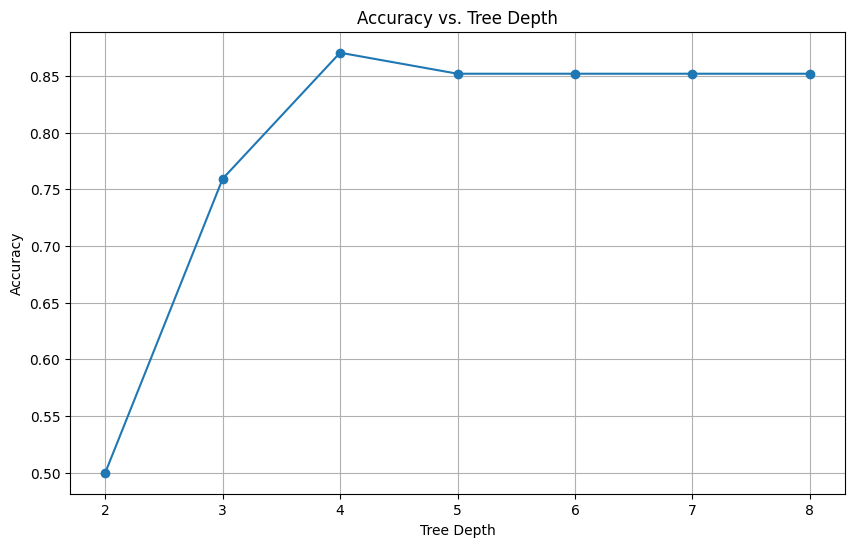

In [74]:
depths = range(2,9)
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.grid(True)
plt.savefig('accuracy_vs_depth_model2.png')
plt.show()

<Figure size 640x480 with 0 Axes>